# <span style="color:#f6f794"> Importing libraries </span>


In [ ]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# <span style="color:#f6f794"> Setting paths and opening file </span>

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir, "")
trying_model = os.path.join(data_dir, "for_trying_model.csv")
raw_data_csv_path = os.path.join(data_dir, "raw_data.csv")

df_students = pd.read_csv(raw_data_csv_path)

# <span style="color:#f6f794"> Start checking the dataset </span>

In [3]:
df_students.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

### <span style="color:#f6f794"> Changing column's names </span>

In [4]:
# Modify columns with 'CamelCase' to 'snake_case'
df_students.columns = [re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', col).lower() for col in df_students.columns]
# Replace spaces with underscores
df_students.columns = df_students.columns.str.replace(' ', '_')
# Changing nacionality for nationality
df_students.rename(columns={'nacionality': 'nationality'}, inplace=True)
df_students.rename(columns={'daytime/evening_attendance': 'attendance'}, inplace=True)

### <span style="color:#f6f794"> Checking dataset </span>

In [5]:
df_students.describe()

,marital_status,application_mode,application_order,course,attendance,previous_qualification,nationality,mother's_qualification,father's_qualification,mother's_occupation,...,curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## <span style="color:#f6f794"> Checking and changing categorical values according the information from where the dataset is </span>

https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data

https://github.com/carmelh/SQL_projects/tree/main/student_data_analysis/Datasets

| Column name                                | Description                                                                    | Type                                             |
|--------------------------------------------|--------------------------------------------------------------------------------|--------------------------------------------------|
| Marital status                             | The marital status of the student.                                             | <span style="color:#01C3F5"> Categorical </span> |
| Application mode                           | The method of application used by the student.                                 | <span style="color:#01C3F5"> Categorical </span> |
| Application order                          | The order in which the student applied.                                        | <span style="color:#EF2877"> Numerical   </span> |
| Course                                     | The course taken by the student.                                               | <span style="color:#01C3F5"> Categorical </span> |
| Daytime/evening attendance                 | Whether the student attends classes during the day or in the evening.          | <span style="color:#01C3F5"> Categorical </span> |
| Previous qualification                     | The qualification obtained by the student before enrolling in higher education.| <span style="color:#01C3F5"> Categorical </span> |
| Nacionality                                | The nationality of the student.                                                | <span style="color:#01C3F5"> Categorical </span> |
| Mother's qualification                     | The qualification of the student's mother.                                     | <span style="color:#01C3F5"> Categorical </span> |
| Father's qualification                     | The qualification of the student's father.                                     | <span style="color:#01C3F5"> Categorical </span> |
| Mother's occupation                        | The occupation of the student's mother.                                        | <span style="color:#01C3F5"> Categorical </span> |
| Father's occupation                        | The occupation of the student's father.                                        | <span style="color:#01C3F5"> Categorical </span> |
| Displaced                                  | Whether the student is a displaced person.                                     | <span style="color:#01C3F5"> Categorical </span> |
| Educational special needs                  | Whether the student has any special educational needs.                         | <span style="color:#01C3F5"> Categorical </span> |
| Debtor                                     | Whether the student is a debtor.                                               | <span style="color:#01C3F5"> Categorical </span> |
| Tuition fees up to date                    | Whether the student's tuition fees are up to date.                             | <span style="color:#01C3F5"> Categorical </span> |
| Gender                                     | The gender of the student.                                                     | <span style="color:#01C3F5"> Categorical </span> |
| Scholarship holder                         | Whether the student is a scholarship holder.                                   | <span style="color:#01C3F5"> Categorical </span> |
| Age at enrollment                          | The age of the student at the time of enrollment.                              | <span style="color:#EF2877"> Numerical   </span> |
| International                              | Whether the student is an international student.                               | <span style="color:#01C3F5"> Categorical </span> |
| Curricular units 1st sem (credited)        | The number of curricular units credited by the student in the first semester.  | <span style="color:#EF2877"> Numerical   </span> |
| Curricular units 1st sem (enrolled)        | The number of curricular units enrolled by the student in the first semester.  | <span style="color:#EF2877"> Numerical   </span> |
| Curricular units 1st sem (evaluations)     | The number of curricular units evaluated by the student in the first semester. | <span style="color:#EF2877"> Numerical   </span> |
| Curricular units 1st sem (approved)        | The number of curricular units approved by the student in the first semester.  | <span style="color:#EF2877"> Numerical   </span> |


### Marital status

In [6]:
df_students["marital_status"].nunique() # 6

6

In [7]:
marital_status_map = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Common-law marriage',
    6: 'Legally separated'
}
df_students["marital_status"] = df_students["marital_status"].map(marital_status_map)

In [8]:
df_students["marital_status"].value_counts()

marital_status
Single                 3919
Married                 379
Divorced                 91
Common-law marriage      25
Legally separated         6
Widower                   4
Name: count, dtype: int64

### Application mode

In [9]:
df_students["application_mode"].nunique() # 18

18

In [10]:
application_mode_map = {
    1:	"1st phase—general contingent",
    2:	"Ordinance No. 612/93",
    3:	"1st phase—special contingent (Azores Island)",
    4:	"Holders of other higher courses",
    5:	"Ordinance No. 854-B/99",
    6:	"International student (bachelor)",
    7:	"1st phase—special contingent (Madeira Island)",
    8:	"2nd phase—general contingent",
    9:	"3rd phase—general contingent",
    10:	"Ordinance No. 533-A/99, item b2) (Different Plan)",
    11:	"Ordinance No. 533-A/99, item b3 (Other Institution)",
    12:	"Over 23 years old",
    13:	"Transfer",
    14:	"Change in course",
    15:	"Technological specialization diploma holders",
    16:	"Change in institution/course",
    17:	"Short cycle diploma holders",
    18:	"Change in institution/course (International)"
}

df_students["application_mode"] = df_students["application_mode"].map(application_mode_map)
df_students["application_mode"].value_counts()

application_mode
1st phase—general contingent                           1708
2nd phase—general contingent                            872
Over 23 years old                                       785
Change in course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase—general contingent                            124
Transfer                                                 77
Change in institution/course                             59
1st phase—special contingent (Madeira Island)            38
Short cycle diploma holders                              35
International student (bachelor)                         30
1st phase—special contingent (Azores Island)             16
Ordinance No. 854-B/99                                   10
Ordinance No. 612/93                                      3
Change in institution/course (International)              1
Ordinance No. 533-A/99,

### Course

In [11]:
df_students["course"].nunique() # 17

17

In [12]:
course_map = {
    1: "Biofuel Production Technologies",
    2: "Animation and Multimedia Design",
    3: "Social Service (evening attendance)",
    4: "Agronomy",
    5: "Communication Design",
    6: "Veterinary Nursing",
    7: "Informatics Engineering",
    8: "Equiniculture",
    9: "Management",
    10: "Social Service",
    11: "Tourism",
    12: "Nursing",
    13: "Oral Hygiene",
    14: "Advertising and Marketing Management",
    15: "Journalism and Communication",
    16: "Basic Education",
    17: "Management (evening attendance)"
}
df_students["course"] = df_students["course"].map(course_map)
df_students["course"].value_counts()

course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Management (evening attendance)         268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equiniculture                           141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64

### Attendance

In [13]:
df_students["attendance"].nunique() # 2

2

In [14]:
attendance_map = {
    0: "Evening",
    1: "Daytime"
}
df_students["attendance"] = df_students["attendance"].map(attendance_map)
df_students["attendance"].value_counts()

attendance
Daytime    3941
Evening     483
Name: count, dtype: int64

### Previous qualification 

In [15]:
df_students["previous_qualification"].nunique() # 17

17

In [16]:
previous_qualification_map = {
    1: "Secondary education",
    2: "Higher education—bachelor’s degree",
    3: "Higher education—degree",
    4: "Higher education—master’s degree",
    5: "Higher education—doctorate",
    6: "Frequency of higher education",
    7: "12th year of schooling—not completed",
    8: "11th year of schooling—not completed",
    9: "Other—11th year of schooling",
    10: "10th year of schooling",
    11: "10th year of schooling—not completed",
    12: "Basic education 3rd cycle (9th/10th/11th year) or equivalent",
    13: "Basic education 2nd cycle (6th/7th/8th year) or equivalent",
    14: "Technological specialization course",
    15: "Higher education—degree (1st cycle)",
    16: "Professional higher technical course",
    17: "Higher education—master’s degree (2nd cycle)"
}
df_students["previous_qualification"] = df_students["previous_qualification"].map(previous_qualification_map)
df_students["previous_qualification"].value_counts()

previous_qualification
Secondary education                                             3717
Technological specialization course                              219
Basic education 3rd cycle (9th/10th/11th year) or equivalent     162
Higher education—degree                                          126
Other—11th year of schooling                                      45
Higher education—degree (1st cycle)                               40
Professional higher technical course                              36
Higher education—bachelor’s degree                                23
Frequency of higher education                                     16
12th year of schooling—not completed                              11
Higher education—master’s degree                                   8
Basic education 2nd cycle (6th/7th/8th year) or equivalent         7
Higher education—master’s degree (2nd cycle)                       6
11th year of schooling—not completed                               4
10th year o

### Nationality  

In [17]:
df_students["nationality"].nunique() # 21

21

In [18]:
nationality_map = {
    1: "Portuguese",
    2: "German",
    3: "Spanish",
    4: "Italian",
    5: "Dutch",
    6: "English",
    7: "Lithuanian",
    8: "Angolan",
    9: "Cape Verdean",
    10: "Guinean",
    11: "Mozambican",
    12: "Santomean",
    13: "Turkish",
    14: "Brazilian",
    15: "Romanian",
    16: "Moldova (Republic of)",
    17: "Mexican",
    18: "Ukrainian",
    19: "Russian",
    20: "Cuban",
    21: "Colombian"
}

df_students["nationality"] = df_students["nationality"].map(nationality_map)
# df_students["nationality"].value_counts()


### Mother's qualification  &    Father's qualification 

In [19]:
df_students["mother's_qualification"].nunique() # 29
df_students["father's_qualification"].nunique() # 34

34

In [20]:
parents_qualification_map = {
    1: "Secondary education—12th year of schooling or equivalent",
    2: "Higher education—bachelor’s degree",
    3: "Higher education—degree",
    4: "Higher education—master’s degree",
    5: "Higher education—doctorate",
    6: "Frequency of higher education",
    7: "12th year of schooling—not completed",
    8: "11th year of schooling—not completed",
    9: "7th year (old)",
    10: "Other—11th year of schooling",
    11: "2nd year complementary high school course",
    12: "10th year of schooling",
    13: "General commerce course",
    14: "Basic education 3rd cycle (9th/10th/11th year) or equivalent",
    15: "Complementary high school course",
    16: "Technical-professional course",
    17: "Complementary high school course—not concluded",
    18: "7th year of schooling",
    19: "2nd cycle of the general high school course",
    20: "9th year of schooling—not completed",
    21: "8th year of schooling",
    22: "General course of administration and commerce",
    23: "Supplementary accounting and administration",
    24: "Unknown",
    25: "Cannot read or write",
    26: "Can read without having a 4th year of schooling",
    27: "Basic education 1st cycle (4th/5th year) or equivalent",
    28: "Basic education 2nd cycle (6th/7th/8th year) or equivalent",
    29: "Technological specialization course",
    30: "Higher education—degree (1st cycle)",
    31: "Specialized higher studies course",
    32: "Professional higher technical course",
    33: "Higher education—master’s degree (2nd cycle)",
    34: "Higher education—doctorate (3rd cycle)"
}
df_students["mother's_qualification"] = df_students["mother's_qualification"].map(parents_qualification_map)
df_students["father's_qualification"] = df_students["father's_qualification"].map(parents_qualification_map)
# df_students["mother's_qualification"].value_counts()
# df_students["father's_qualification"].value_counts()

### Mother's occupation   &  Father's occupation 

In [21]:
df_students["mother's_occupation"].nunique() # 32
df_students["father's_occupation"].nunique() # 46

46

In [22]:
parents_occupation_map = {
    1: "Student",
    2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    3: "Specialists in Intellectual and Scientific Activities",
    4: "Intermediate Level Technicians and Professions",
    5: "Administrative staff",
    6: "Personal Services, Security and Safety Workers, and Sellers",
    7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
    8: "Skilled Workers in Industry, Construction, and Craftsmen",
    9: "Installation and Machine Operators and Assembly Workers",
    10: "Unskilled Workers",
    11: "Armed Forces Professions",
    12: "Other Situation; 13—(blank)",
    13: "Armed Forces Officers",
    14: "Armed Forces Sergeants",
    15: "Other Armed Forces personnel",
    16: "Directors of administrative and commercial services",
    17: "Hotel, catering, trade, and other services directors",
    18: "Specialists in the physical sciences, mathematics, engineering, and related techniques",
    19: "Health professionals",
    20: "Teachers",
    21: "Specialists in finance, accounting, administrative organization, and public and commercial relations",
    22: "Intermediate level science and engineering technicians and professions",
    23: "Technicians and professionals of intermediate level of health",
    24: "Intermediate level technicians from legal, social, sports, cultural, and similar services",
    25: "Information and communication technology technicians",
    26: "Office workers, secretaries in general, and data processing operators",
    27: "Data, accounting, statistical, financial services, and registry-related operators",
    28: "Other administrative support staff",
    29: "Personal service workers",
    30: "Sellers",
    31: "Personal care workers and the like",
    32: "Protection and security services personnel",
    33: "Market-oriented farmers and skilled agricultural and animal production workers",
    34: "Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",
    35: "Skilled construction workers and the like, except electricians",
    36: "Skilled workers in metallurgy, metalworking, and similar",
    37: "Skilled workers in electricity and electronics",
    38: "Workers in food processing, woodworking, and clothing and other industries and crafts",
    39: "Fixed plant and machine operators",
    40: "Assembly workers",
    41: "Vehicle drivers and mobile equipment operators",
    42: "Unskilled workers in agriculture, animal production, and fisheries and forestry",
    43: "Unskilled workers in extractive industry, construction, manufacturing, and transport",
    44: "Meal preparation assistants",
    45: "Street vendors (except food) and street service providers",
    46: "Other occupations"
}

df_students["mother's_occupation"] = df_students["mother's_occupation"].map(parents_occupation_map)
df_students["father's_occupation"] = df_students["father's_occupation"].map(parents_occupation_map)
# df_students["mother's_occupation"].value_counts()
# df_students["father's_occupation"].value_counts()

### Displaced

In [23]:
df_students["displaced"].nunique() # 2
df_students["displaced"].value_counts()

displaced_map = {
    0: "No",
    1: "Yes"
}

df_students["displaced"] = df_students["displaced"].map(displaced_map)

### Educational special needs      

In [24]:
df_students["educational_special_needs"].nunique() # 2
df_students["educational_special_needs"].value_counts()

educational_special_needs_map = {
    0: "No",
    1: "Yes"
}
df_students["educational_special_needs"] = df_students["educational_special_needs"].map(educational_special_needs_map)

### Debtor 

In [25]:
df_students["debtor"].nunique() # 2
df_students["debtor"].value_counts()

debtor_map = {
    0: "No",
    1: "Yes"
} 
df_students["debtor"] = df_students["debtor"].map(debtor_map)

### Tuition fees up to date 

In [26]:
df_students["tuition_fees_up_to_date"].nunique() # 2
df_students["tuition_fees_up_to_date"].value_counts()

tuition_fees_up_to_date_map = {
    0: "No",
    1: "Yes"
}
df_students["tuition_fees_up_to_date"] = df_students["tuition_fees_up_to_date"].map(tuition_fees_up_to_date_map)

### Gender

In [27]:
df_students["gender"].nunique() # 2

2

In [28]:
gender_map = {
    0: "Female",
    1: "Male"
}

df_students["gender"] = df_students["gender"].map(gender_map)
df_students["gender"].value_counts()

gender
Female    2868
Male      1556
Name: count, dtype: int64

### Scholarship holder    

In [29]:
df_students["scholarship_holder"].nunique() # 2
df_students["scholarship_holder"].value_counts()

scholarship_holder_map = {
    0: "No",
    1: "Yes"
}
df_students["scholarship_holder"] = df_students["scholarship_holder"].map(scholarship_holder_map)

## <span style="color:#f6f794">  Revisión de la cardinalidad </span>

Revisar la cantidad de valores únicos de las columnas categóricas para evaluar y se ha de usar one-hot encoding o no.

In [30]:
for col in df_students.columns:
    if df_students[col].dtype == 'object' or df_students[col].dtype.name == 'category':
        print(f"{col}: {df_students[col].nunique()}")


marital_status: 6
application_mode: 18
course: 17
attendance: 2
previous_qualification: 17
nationality: 21
mother's_qualification: 29
father's_qualification: 34
mother's_occupation: 32
father's_occupation: 46
displaced: 2
educational_special_needs: 2
debtor: 2
tuition_fees_up_to_date: 2
gender: 2
scholarship_holder: 2
target: 3


## <span style="color:#f6f794">  Revisión de las variables importantes </span>

<Axes: title={'center': "Top 10 - Mother's Occupation"}, xlabel="mother's_occupation">

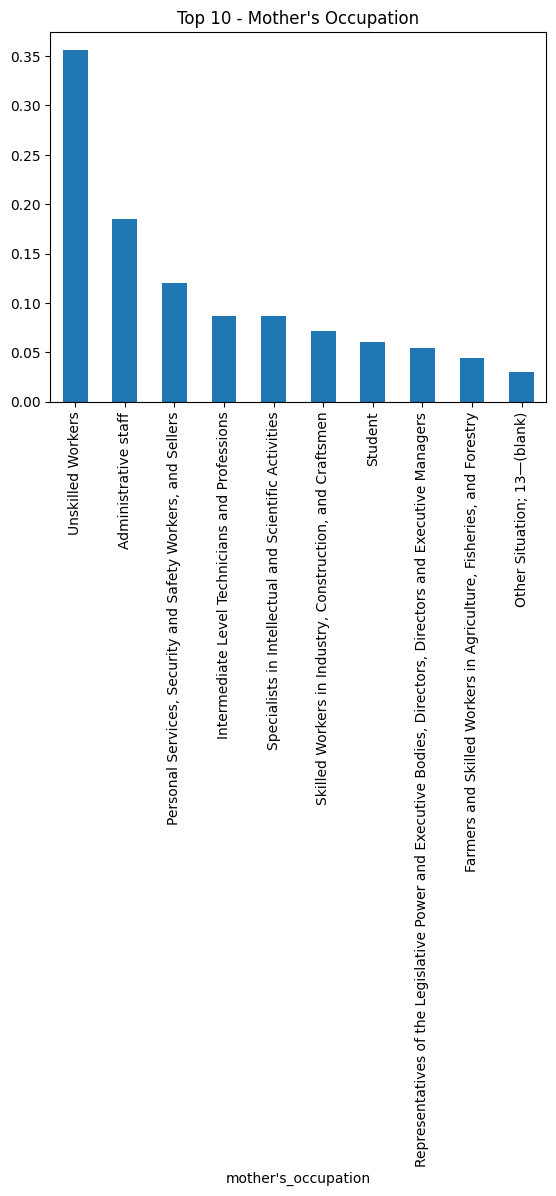

In [31]:
# Ver el top 10 de las ocupaciones de los padres
df_students["father's_occupation"].value_counts(normalize=True).head(10).plot(kind='bar', title="Top 10 - Father's Occupation")
df_students["mother's_occupation"].value_counts(normalize=True).head(10).plot(kind='bar', title="Top 10 - Mother's Occupation")



### Ver la relación entre categorías de una columna con la columna target

In [32]:
# Uso de tablas cruzadas para ver si hay alguna relación entre la ocupación de los padres y el target en porcentaje
(pd.crosstab(df_students["mother's_occupation"], df_students["target"], normalize='index') * 100).round(0)


target,Dropout,Enrolled,Graduate
mother's_occupation,,,
Administrative staff,30.0,18.0,52.0
Armed Forces Officers,76.0,12.0,12.0
Armed Forces Professions,25.0,50.0,25.0
Armed Forces Sergeants,0.0,100.0,0.0
"Data, accounting, statistical, financial services, and registry-related operators",0.0,100.0,0.0
Directors of administrative and commercial services,0.0,0.0,100.0
"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",29.0,15.0,56.0
Health professionals,25.0,50.0,25.0
"Hotel, catering, trade, and other services directors",0.0,100.0,0.0


# <span style="color:#f6f794"> Guardar dataset </span>

In [33]:
df_students.to_csv(trying_model, index=False)

if os.path.exists(trying_model):
    print("File succesfully saved.")
    print(f" File size: {os.path.getsize(trying_model) / 1024:.2f} KB")
else:
    print("⚠️ Error while saving file.")

File succesfully saved.
 File size: 1573.12 KB
